# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dimas Prasetiyo
- **Email:** dimastiyo011@gmail.com
- **ID Dicoding:** Dimas Prasetiyo

## Menentukan Pertanyaan Bisnis

- Di jam berapa polusi PM2.5 paling tinggi dalam satu hari?
- Apakah hujan (RAIN) mempengaruhi konsentrasi polutan udara seperti PM2.5 dan SO2?
- Stasiun mana yang memiliki tingkat polusi tertinggi untuk PM10 selama periode tertentu (misalnya, setahun)?
- Bagaimana perbandingan kualitas udara antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv', delimiter=',')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv', delimiter=',')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', delimiter=',')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv', delimiter=',')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv', delimiter=',')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv', delimiter=',')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv', delimiter=',')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv', delimiter=',')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv', delimiter=',')
df10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv', delimiter=',')
df11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv', delimiter=',')
df12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv', delimiter=',')

merged_df = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)

merged_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [5]:
merged_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [6]:
merged_df.duplicated().sum()

0

### Cleaning Data

In [7]:
merged_df.dropna(inplace=True, axis=0)

In [8]:
merged_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [45]:
merged_df.to_excel('data_udara.xlsx')

## Exploratory Data Analysis (EDA)

### Explore ...

Di jam berapa polusi PM2.5 paling tinggi dalam satu hari?

In [9]:
merged_df['datetime'] = pd.to_datetime(merged_df[['year', 'month', 'day', 'hour']])

In [10]:
df = merged_df.copy()
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031,2015-03-19 02:55:51.850494976
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000,2013-03-01 00:00:00
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000,2014-04-05 09:00:00
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000,2015-03-25 06:00:00
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-03-09 18:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152,NaN


In [11]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017])

In [12]:
hourly_avg = df.groupby(df['datetime'].dt.hour)['PM2.5'].mean()

Apakah hujan (RAIN) mempengaruhi konsentrasi polutan udara seperti PM2.5 dan SO2?

In [13]:
def categorize_rain(rain):
    if rain == 0:
        return 'Tidak Hujan'
    elif rain < 10:
        return 'Hujan Ringan'
    elif rain < 50:
        return 'Hujan Sedang'
    else:
        return 'Hujan Lebat'

In [14]:
df['Rain_Category'] = df['RAIN'].apply(categorize_rain)

In [15]:
rain_effect = df.groupby('Rain_Category')[['PM2.5', 'SO2']].mean().reset_index()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di jam berapa polusi PM2.5 paling tinggi dalam satu hari?

Rata-rata polusi PM2.5 paling tinggi terjadi pada jam 22:00 dengan nilai 88.28


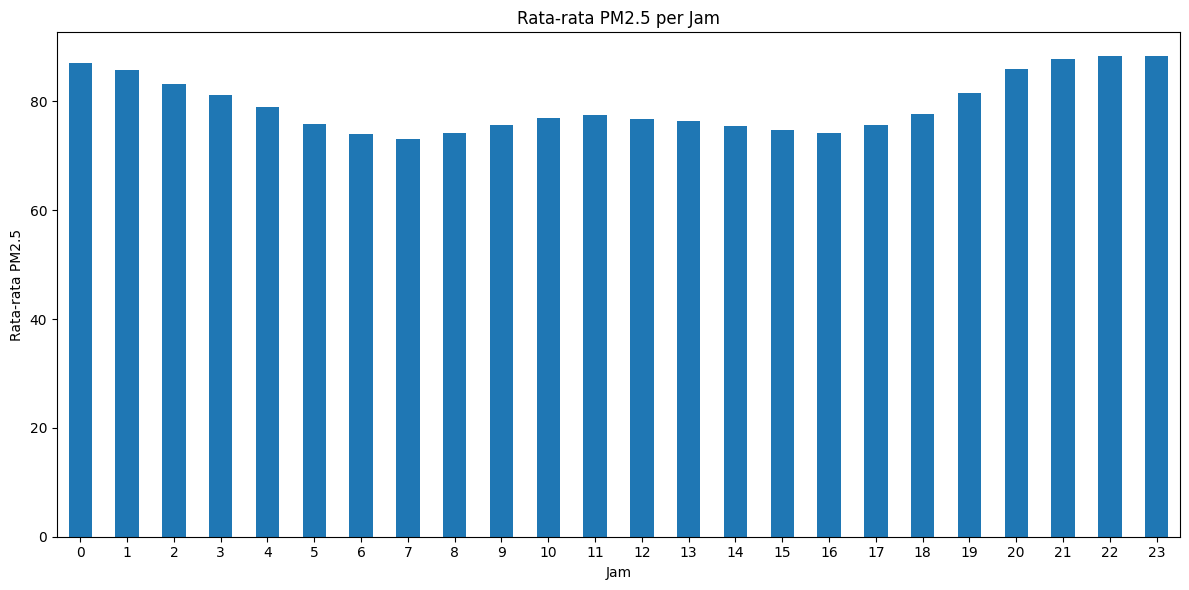

In [17]:
max_hour = hourly_avg.idxmax()
max_pm25 = hourly_avg.max()

print(f"Rata-rata polusi PM2.5 paling tinggi terjadi pada jam {max_hour}:00 dengan nilai {max_pm25:.2f}")

# Visualisasi
plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar')
plt.title('Rata-rata PM2.5 per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah hujan (RAIN) mempengaruhi konsentrasi polutan udara seperti PM2.5 dan SO2?

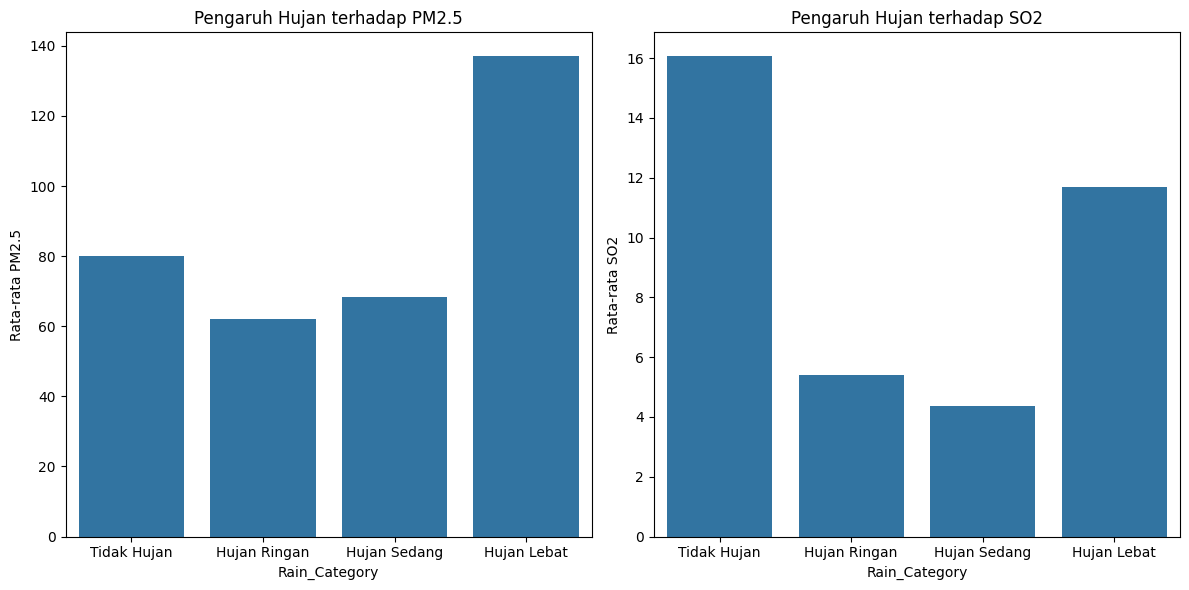

In [18]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Plot untuk PM2.5
plt.subplot(1, 2, 1)
sns.barplot(x='Rain_Category', y='PM2.5', data=rain_effect, order=['Tidak Hujan', 'Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat'])
plt.title('Pengaruh Hujan terhadap PM2.5')
plt.ylabel('Rata-rata PM2.5')

# Plot untuk SO2
plt.subplot(1, 2, 2)
sns.barplot(x='Rain_Category', y='SO2', data=rain_effect, order=['Tidak Hujan', 'Hujan Ringan', 'Hujan Sedang', 'Hujan Lebat'])
plt.title('Pengaruh Hujan terhadap SO2')
plt.ylabel('Rata-rata SO2')

plt.tight_layout()
plt.show()

### Pertanyaan 3 : Stasiun mana yang memiliki tingkat polusi tertinggi untuk PM10 selama periode tertentu (misalnya, setahun)?


Rata-rata PM10 per stasiun untuk tahun 2013:
station
Gucheng          113.759130
Aotizhongxin     112.373625
Dongsi           111.807390
Wanshouxigong    111.103743
Tiantan          109.216208
Wanliu           109.046759
Guanyuan         107.101548
Nongzhanguan     104.472318
Shunyi            98.928202
Huairou           98.433698
Changping         90.422623
Dingling          79.876749
Name: PM10, dtype: float64


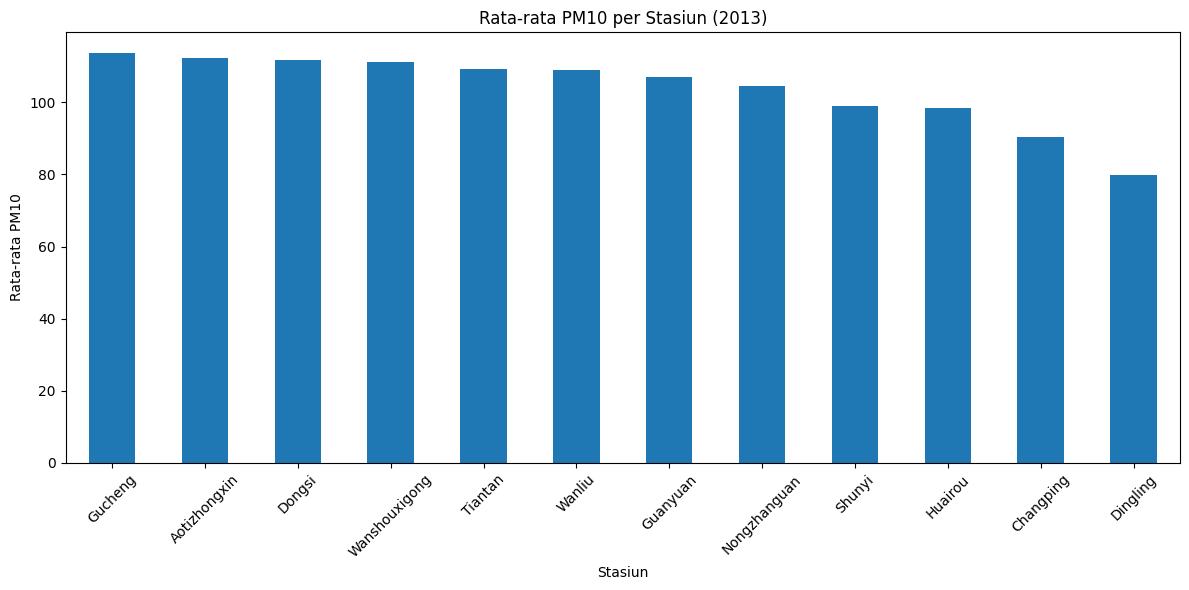


Stasiun dengan tingkat polusi PM10 tertinggi pada tahun 2013:
Stasiun: Gucheng
Rata-rata PM10: 113.76

Rata-rata PM10 per stasiun untuk tahun 2014:
station
Gucheng          133.696756
Wanliu           129.420364
Wanshouxigong    125.921362
Nongzhanguan     125.775208
Aotizhongxin     121.718791
Guanyuan         116.161403
Dongsi           114.785129
Tiantan          112.865709
Shunyi           110.994835
Changping        106.122316
Huairou          100.198586
Dingling          91.313233
Name: PM10, dtype: float64


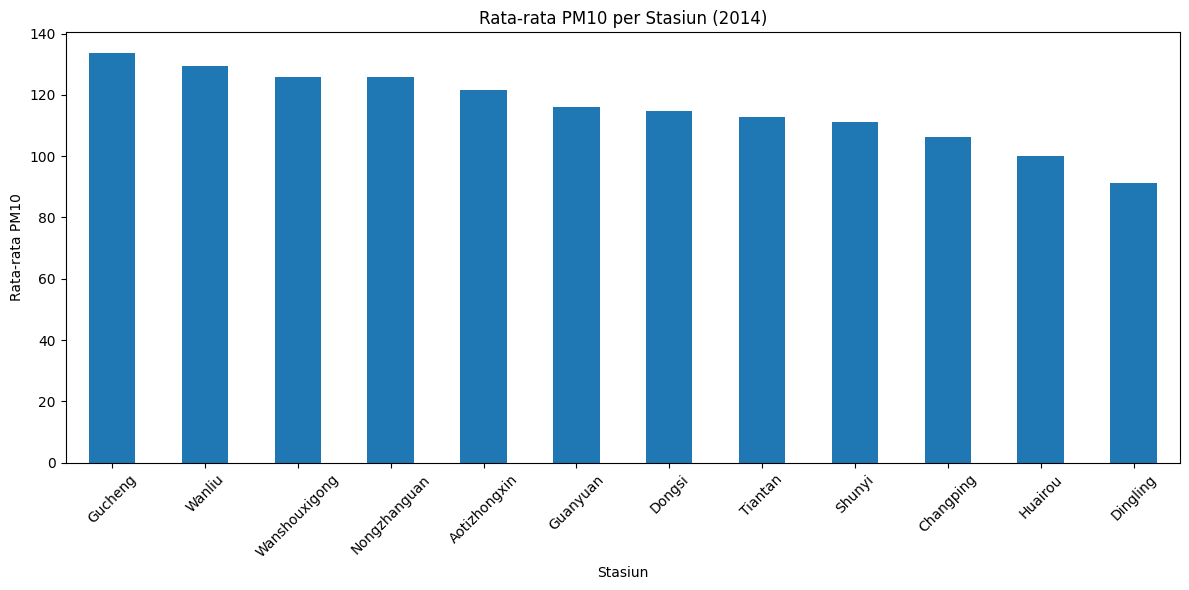


Stasiun dengan tingkat polusi PM10 tertinggi pada tahun 2014:
Stasiun: Gucheng
Rata-rata PM10: 133.70

Rata-rata PM10 per stasiun untuk tahun 2015:
station
Gucheng          116.208587
Dongsi           111.775149
Wanshouxigong    110.538498
Aotizhongxin     109.548314
Nongzhanguan     107.234883
Guanyuan         106.694346
Wanliu           104.998840
Tiantan          101.996219
Shunyi            99.289145
Changping         93.497604
Huairou           90.461231
Dingling          85.385466
Name: PM10, dtype: float64


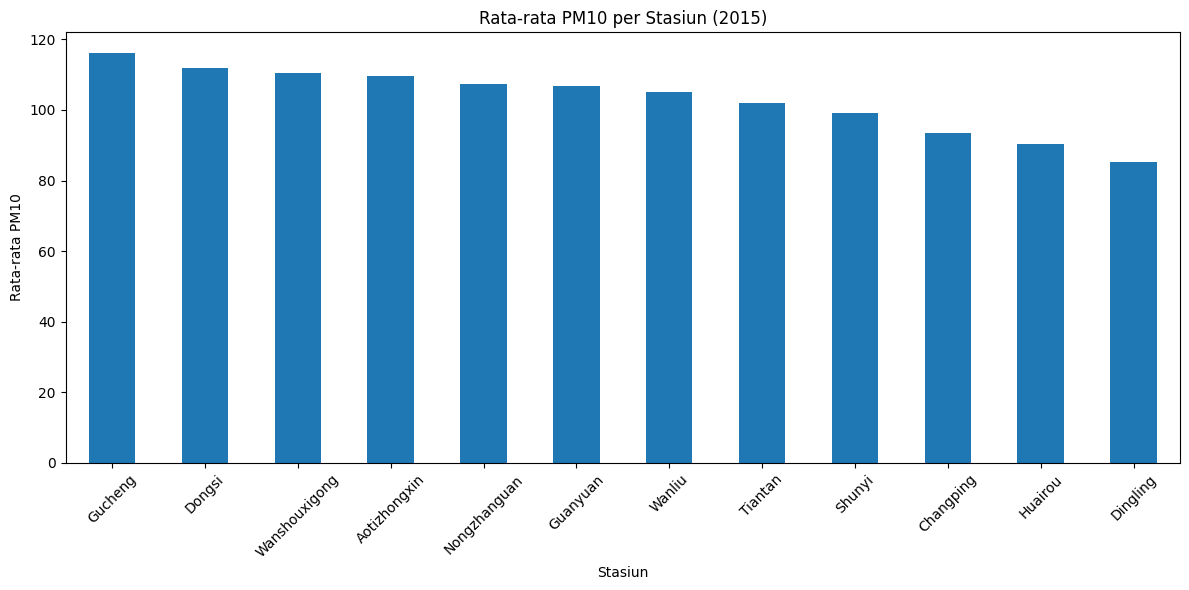


Stasiun dengan tingkat polusi PM10 tertinggi pada tahun 2015:
Stasiun: Gucheng
Rata-rata PM10: 116.21

Rata-rata PM10 per stasiun untuk tahun 2016:
station
Gucheng          110.748354
Guanyuan         105.176736
Dongsi           103.554159
Wanshouxigong     99.167513
Tiantan           97.253771
Nongzhanguan      97.062739
Aotizhongxin      94.281883
Wanliu            92.963425
Shunyi            86.734100
Changping         85.564015
Huairou           82.569465
Dingling          80.785760
Name: PM10, dtype: float64


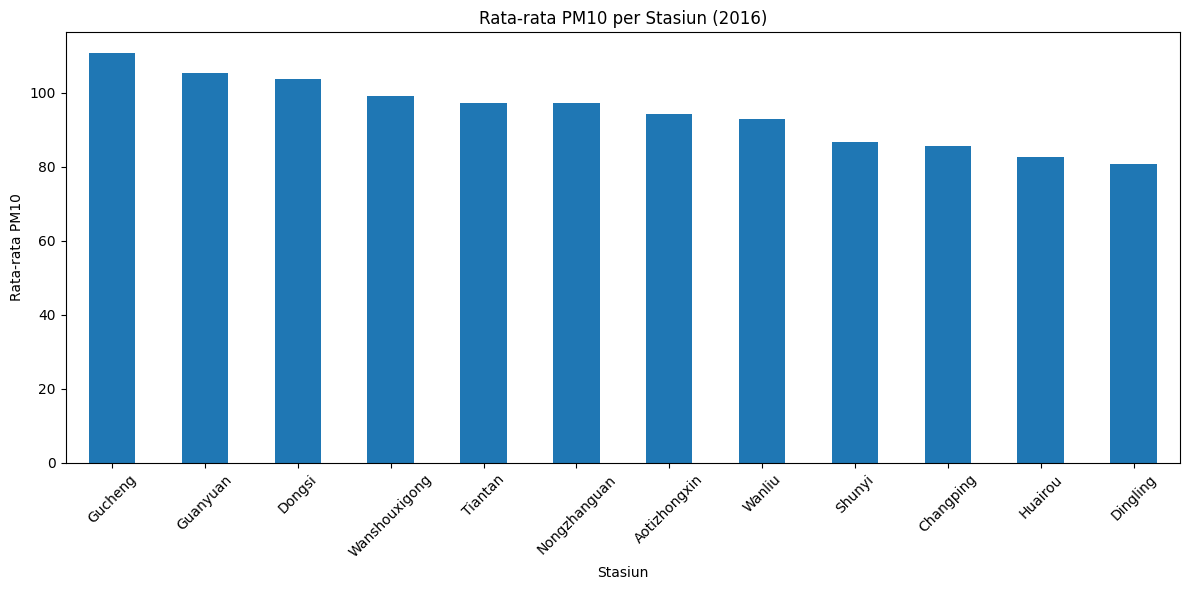


Stasiun dengan tingkat polusi PM10 tertinggi pada tahun 2016:
Stasiun: Gucheng
Rata-rata PM10: 110.75

Rata-rata PM10 per stasiun untuk tahun 2017:
station
Dongsi           127.714071
Gucheng          125.654046
Tiantan          121.994749
Wanshouxigong    119.342126
Nongzhanguan     117.883756
Guanyuan         111.456621
Aotizhongxin     108.040329
Wanliu           107.669397
Shunyi           103.431571
Changping         93.792620
Huairou           91.836582
Dingling          78.922337
Name: PM10, dtype: float64


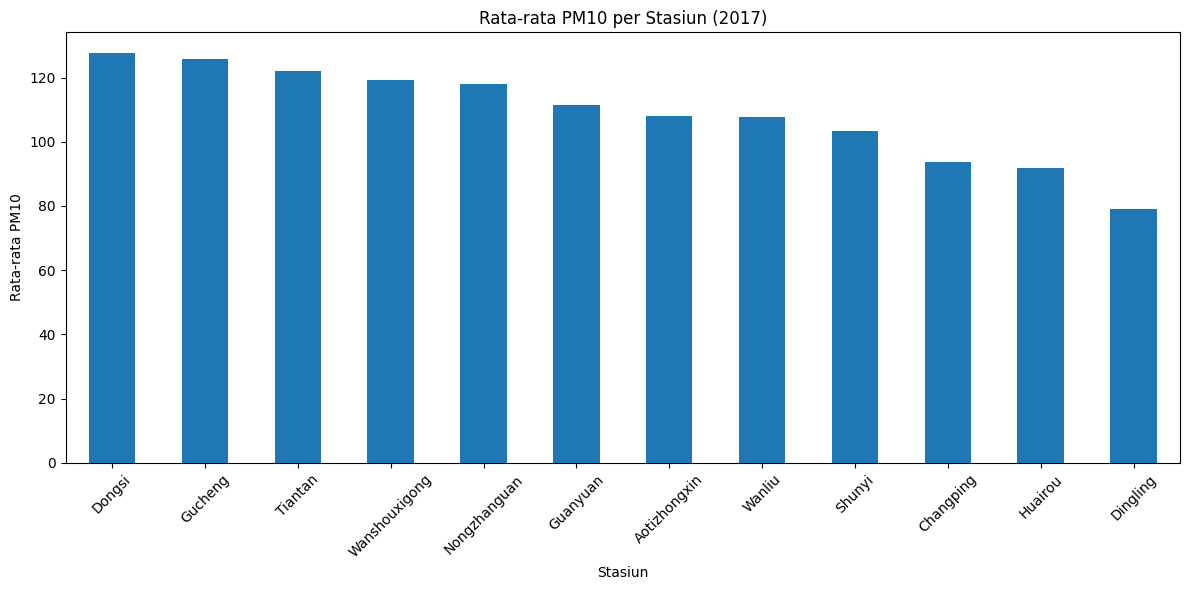


Stasiun dengan tingkat polusi PM10 tertinggi pada tahun 2017:
Stasiun: Dongsi
Rata-rata PM10: 127.71


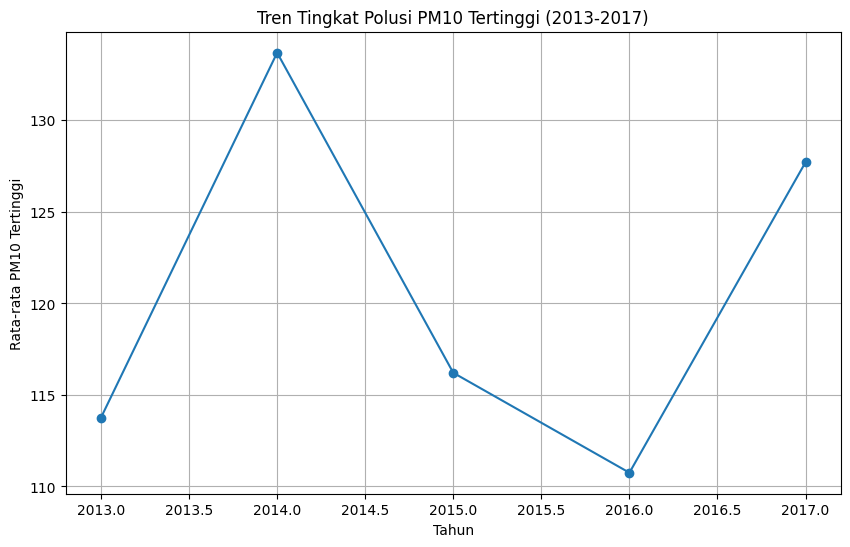


Tren tingkat polusi PM10 tertinggi dari 2013-2017:
2013: 113.76
2014: 133.70
2015: 116.21
2016: 110.75
2017: 127.71


In [19]:
# Konversi kolom tanggal ke format datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Daftar tahun yang akan dianalisis
years = [2013, 2014, 2015, 2016, 2017]

# Membuat dictionary untuk menyimpan hasil per tahun
results = {}

# Analisis untuk setiap tahun
for year in years:
    # Filter data untuk tahun tertentu
    df_filtered = df[df['date'].dt.year == year]

    # Hitung rata-rata PM10 per stasiun
    pm10_avg = df_filtered.groupby('station')['PM10'].mean().sort_values(ascending=False)

    # Simpan hasil
    results[year] = pm10_avg

    # Tampilkan hasil
    print(f"\nRata-rata PM10 per stasiun untuk tahun {year}:")
    print(pm10_avg)

    # Visualisasi dengan bar plot
    plt.figure(figsize=(12, 6))
    pm10_avg.plot(kind='bar')
    plt.title(f'Rata-rata PM10 per Stasiun ({year})')
    plt.xlabel('Stasiun')
    plt.ylabel('Rata-rata PM10')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Identifikasi stasiun dengan tingkat polusi PM10 tertinggi
    highest_station = pm10_avg.index[0]
    highest_pm10 = pm10_avg.iloc[0]

    print(f"\nStasiun dengan tingkat polusi PM10 tertinggi pada tahun {year}:")
    print(f"Stasiun: {highest_station}")
    print(f"Rata-rata PM10: {highest_pm10:.2f}")

# Analisis tren tingkat polusi tertinggi selama periode 2013-2017
highest_pm10_trend = {year: results[year].iloc[0] for year in years}

plt.figure(figsize=(10, 6))
plt.plot(highest_pm10_trend.keys(), highest_pm10_trend.values(), marker='o')
plt.title('Tren Tingkat Polusi PM10 Tertinggi (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM10 Tertinggi')
plt.grid(True)
plt.show()

print("\nTren tingkat polusi PM10 tertinggi dari 2013-2017:")
for year, value in highest_pm10_trend.items():
    print(f"{year}: {value:.2f}")

### Pertanyaan 4 : Bagaimana perbandingan kualitas udara antara hari kerja dan akhir pekan?


Statistik deskriptif untuk PM2.5:
             count       mean        std       min        25%        50%  \
is_weekend                                                                 
0           1043.0  78.008655  65.528250  5.434164  30.145550  60.304813   
1            418.0  83.774089  70.896767  6.140684  34.565434  61.545614   

                   75%         max  
is_weekend                          
0           105.305784  462.748954  
1           113.613247  442.142857  


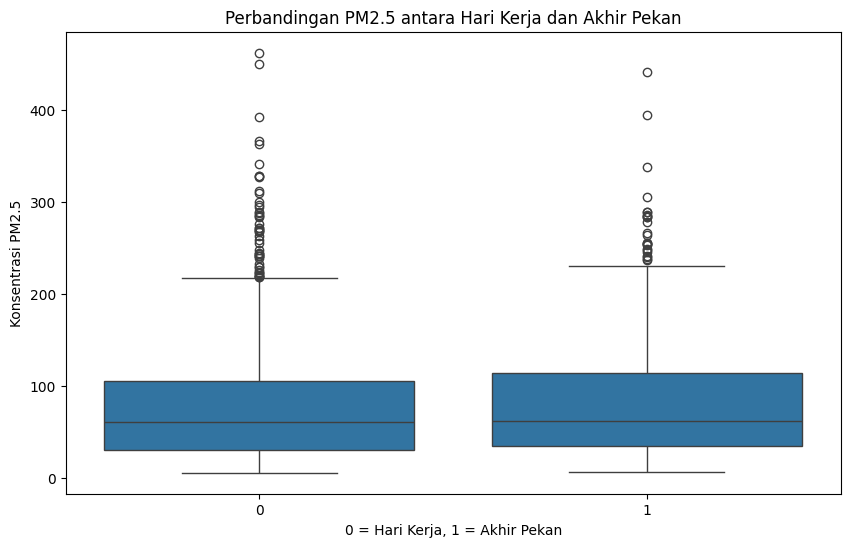


Statistik deskriptif untuk PM10:
             count        mean        std        min        25%        50%  \
is_weekend                                                                   
0           1043.0  102.433225  69.300812  10.339286  49.132033  89.266904   
1            418.0  110.354208  76.152503   6.429658  53.223564  88.344035   

                   75%         max  
is_weekend                          
0           134.807426  495.782427  
1           142.566512  496.247387  


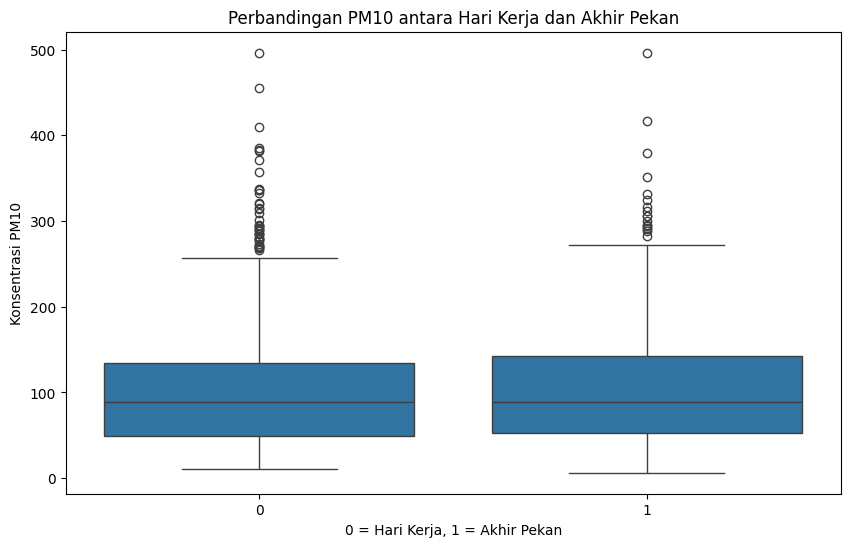


Statistik deskriptif untuk SO2:
             count       mean        std       min       25%       50%  \
is_weekend                                                               
0           1043.0  15.621612  17.159364  2.000000  4.505255  9.332090   
1            418.0  16.630612  18.523115  2.007168  4.329356  9.420877   

                  75%         max  
is_weekend                         
0           19.744907  132.446078  
1           21.882854  129.833333  


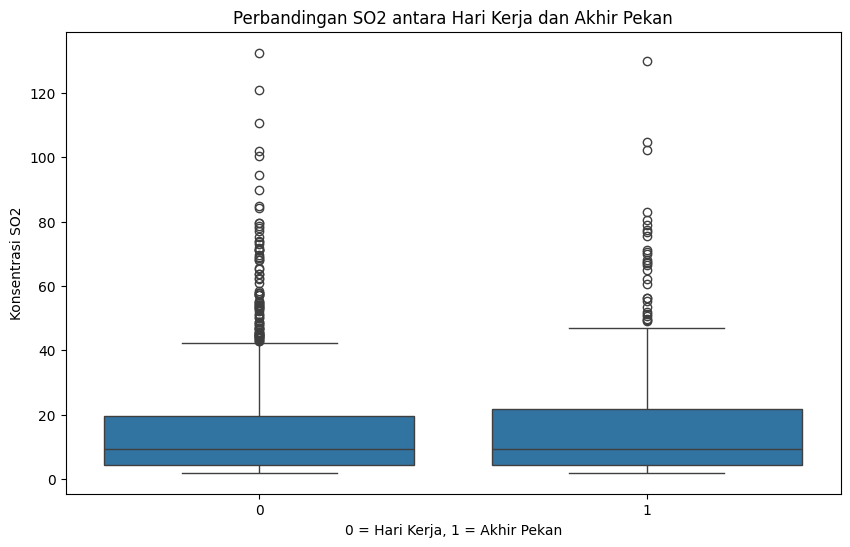


Statistik deskriptif untuk NO2:
             count       mean        std        min        25%        50%  \
is_weekend                                                                  
0           1043.0  50.510037  24.007872   8.959678  33.897279  44.351254   
1            418.0  51.053892  24.538826  10.985915  33.779394  44.602039   

                  75%         max  
is_weekend                         
0           62.039346  153.069091  
1           62.870759  139.139373  


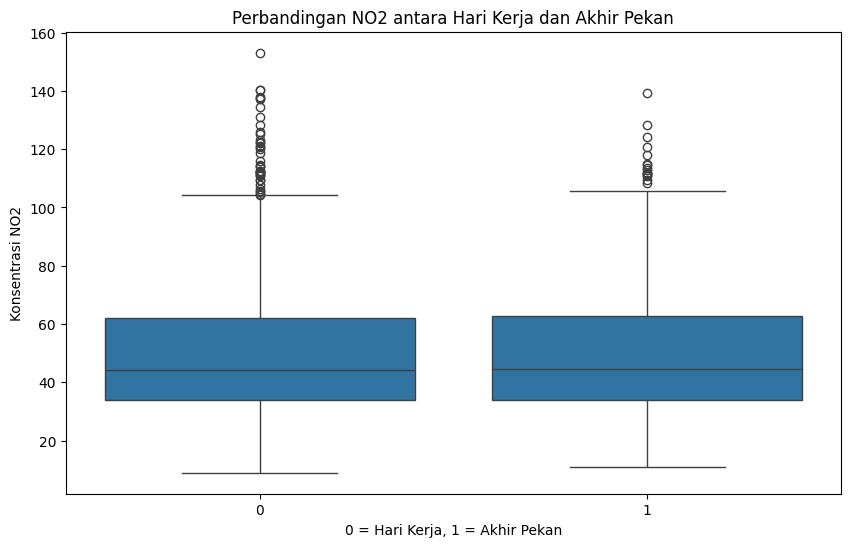


Statistik deskriptif untuk CO:
             count         mean         std         min         25%  \
is_weekend                                                            
0           1043.0  1214.738427  926.269605  220.472441  632.288316   
1            418.0  1276.422450  943.675105  247.148289  655.729167   

                   50%          75%          max  
is_weekend                                        
0           953.211009  1449.288958  7945.090909  
1           974.589414  1548.135684  6520.209059  


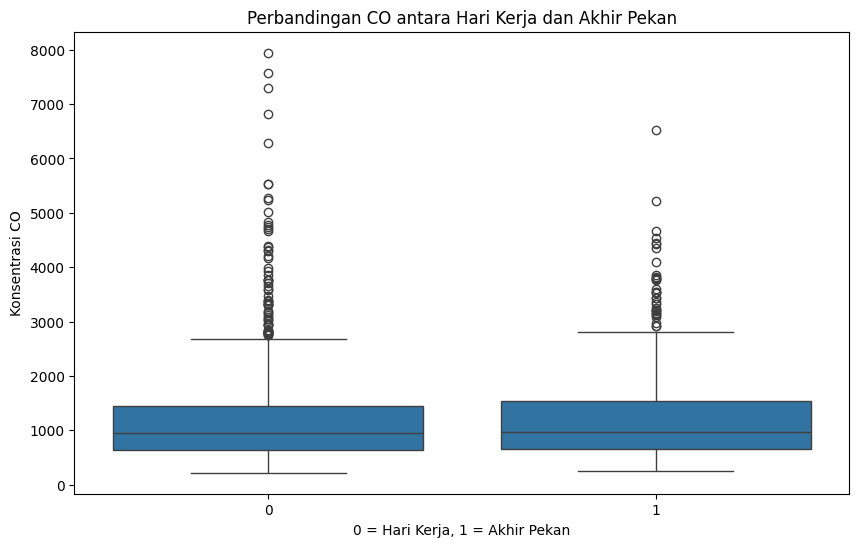


Statistik deskriptif untuk O3:
             count       mean        std       min        25%        50%  \
is_weekend                                                                 
0           1043.0  56.840519  36.946457  2.194346  27.205093  52.507042   
1            418.0  58.071033  38.608437  2.716981  24.619257  51.603115   

                  75%         max  
is_weekend                         
0           81.213572  176.854271  
1           82.517477  162.651341  


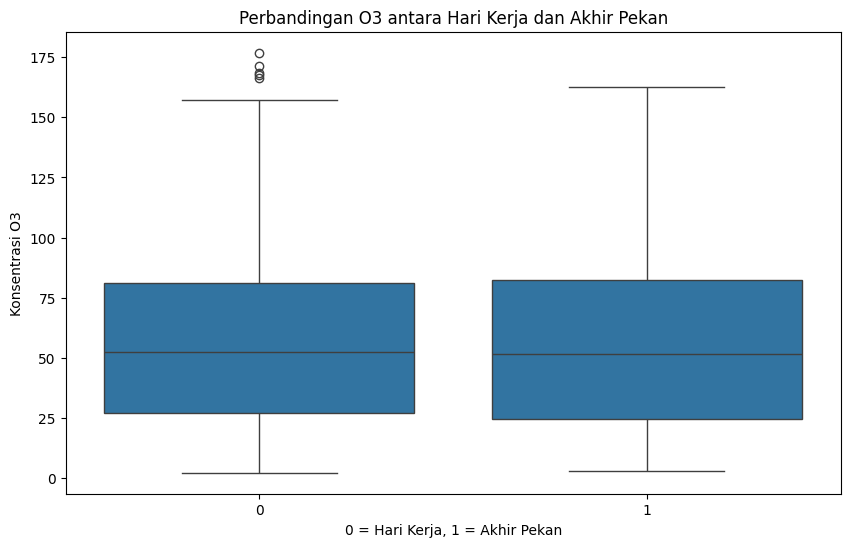

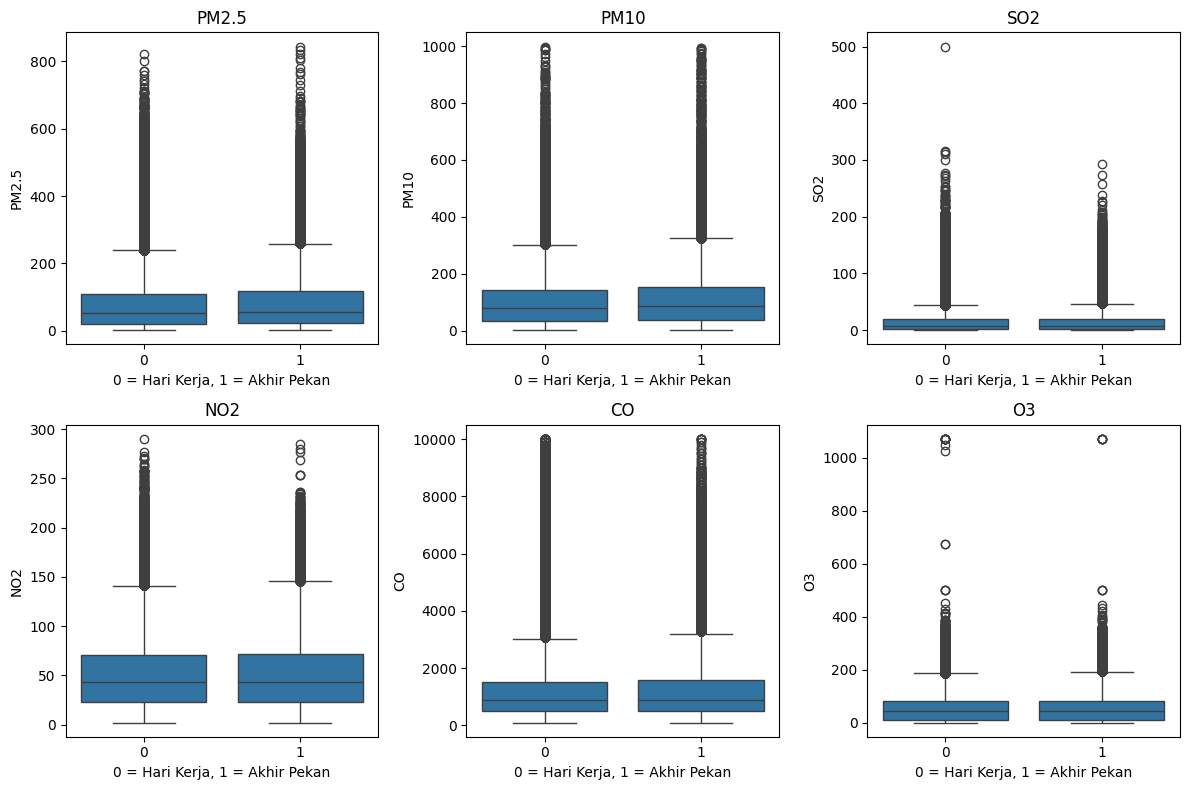


Hasil uji statistik (t-test):
PM2.5: t-statistic = -19.6134, p-value = 0.0000
PM10: t-statistic = -24.3190, p-value = 0.0000
SO2: t-statistic = -14.1832, p-value = 0.0000
NO2: t-statistic = -5.8669, p-value = 0.0000
CO: t-statistic = -15.7582, p-value = 0.0000
O3: t-statistic = -5.7498, p-value = 0.0000


In [20]:
# Tambahkan kolom untuk hari dalam seminggu (0 = Senin, 6 = Minggu)
df['day_of_week'] = df['date'].dt.dayofweek

# Buat kolom baru untuk menandai hari kerja (0) dan akhir pekan (1)
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Daftar polutan yang akan dianalisis
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Fungsi untuk membuat box plot
def create_boxplot(data, pollutant):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_weekend', y=pollutant, data=data)
    plt.title(f'Perbandingan {pollutant} antara Hari Kerja dan Akhir Pekan')
    plt.xlabel('0 = Hari Kerja, 1 = Akhir Pekan')
    plt.ylabel(f'Konsentrasi {pollutant}')
    plt.show()

# Analisis untuk setiap polutan
for pollutant in pollutants:
    # Hitung rata-rata harian
    daily_avg = df.groupby(['date', 'is_weekend'])[pollutant].mean().reset_index()

    # Tampilkan statistik deskriptif
    print(f"\nStatistik deskriptif untuk {pollutant}:")
    print(daily_avg.groupby('is_weekend')[pollutant].describe())

    # Buat box plot
    create_boxplot(daily_avg, pollutant)

# Analisis agregat untuk semua polutan
plt.figure(figsize=(12, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_weekend', y=pollutant, data=df)
    plt.title(pollutant)
    plt.xlabel('0 = Hari Kerja, 1 = Akhir Pekan')

plt.tight_layout()
plt.show()

# Uji statistik (t-test) untuk setiap polutan
from scipy import stats

print("\nHasil uji statistik (t-test):")
for pollutant in pollutants:
    weekday_data = df[df['is_weekend'] == 0][pollutant]
    weekend_data = df[df['is_weekend'] == 1][pollutant]
    t_stat, p_value = stats.ttest_ind(weekday_data, weekend_data)
    print(f"{pollutant}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")